# Graph Analysis Assignment

## Team Members
**Ahm Hamza, Ali Ahmed, Nilsa Bermudez, Ursula Podosenin**
## Overview

For this assignment examines the famous Zachary's Karate Club network, a classic dataset in social network analysis that represents the social relationships between members of a university karate club. The network captures the relationships that existed before a split in the club due to a dispute between the club's administrator and instructor.


In [1]:
#importing necessary library
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Data loading
We use the built-in `karate_club_graph()` from NetworkX.

In [2]:
G = nx.karate_club_graph()


## Basic Graph Analysis

pos: Computes the positions of nodes using a force-directed layout for visualization.
Then we compute the number of nodes, edges, the graph diameter measures the longest shortest path between any two nodes in the graph, and the average clustering coefficient which indicates how closely nodes in the graph tend to cluster together.. The Karate Club graph is a well-known social network with 34 nodes (club members) and 78 edges (friendships).

In [3]:
pos = nx.spring_layout(G, seed=42)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
diameter = nx.diameter(G)
avg_clustering = nx.average_clustering(G)

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Diameter: {diameter}")
print(f"Average Clustering Coefficient: {avg_clustering:.3f}")

Number of Nodes: 34
Number of Edges: 78
Diameter: 5
Average Clustering Coefficient: 0.571


# Calculate the centrality metrics
Different centrality measures are computed to assess the importance of nodes in a network. **Degree Centrality** indicates the number of direct connections a node has, while **Betweenness** **Centrality** measures how often a node lies on the shortest path between other nodes. **Closeness Centrality** reflects how quickly a node can access others in the network. **Eigenvector Centrality** gauges a node's influence based on the importance of its neighbors, and **PageRank** is a variant that ranks nodes according to their link structure.



In [4]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)


In [5]:
centralities = {
    "Degree Centrality": nx.degree_centrality(G),
    "Betweenness Centrality": nx.betweenness_centrality(G),
    "Closeness Centrality": nx.closeness_centrality(G),
    "Eigenvector Centrality": nx.eigenvector_centrality(G),
    "PageRank": nx.pagerank(G)
}

## Compiling nodes mentircs
 Here we summarize the metrics for each of these nodes

In [6]:
metrics = []
for node in G.nodes():
    metrics.append({
        'node': node,
        'degree': G.degree[node],
        'degree_centrality': degree_centrality[node],
        'betweenness': betweenness_centrality[node],
        'closeness': closeness_centrality[node],
        'eigenvector': eigenvector_centrality[node],
        'pagerank': pagerank[node]
    })


## Top Nodes Identification


 Organize all centrality metrics into a structured format and identify the top 10 most connected nodes.



In [7]:
top_10 = sorted(metrics, key=lambda x: x['degree'], reverse=True)[:10]


In [8]:
print("Top 10 nodes by degree:")
for m in top_10:
    print(f"Node {m['node']:2d}: degree={m['degree']}, degree_centrality={m['degree_centrality']:.2f}, "
          f"betweenness={m['betweenness']:.2f}, closeness={m['closeness']:.2f}, "
          f"eigenvector={m['eigenvector']:.2f}, pagerank={m['pagerank']:.2f}")

Top 10 nodes by degree:
Node 33: degree=17, degree_centrality=0.52, betweenness=0.30, closeness=0.55, eigenvector=0.37, pagerank=0.10
Node  0: degree=16, degree_centrality=0.48, betweenness=0.44, closeness=0.57, eigenvector=0.36, pagerank=0.09
Node 32: degree=12, degree_centrality=0.36, betweenness=0.15, closeness=0.52, eigenvector=0.31, pagerank=0.08
Node  2: degree=10, degree_centrality=0.30, betweenness=0.14, closeness=0.56, eigenvector=0.32, pagerank=0.06
Node  1: degree=9, degree_centrality=0.27, betweenness=0.05, closeness=0.49, eigenvector=0.27, pagerank=0.06
Node  3: degree=6, degree_centrality=0.18, betweenness=0.01, closeness=0.46, eigenvector=0.21, pagerank=0.04
Node 31: degree=6, degree_centrality=0.18, betweenness=0.14, closeness=0.54, eigenvector=0.19, pagerank=0.04
Node  8: degree=5, degree_centrality=0.15, betweenness=0.06, closeness=0.52, eigenvector=0.23, pagerank=0.03
Node 13: degree=5, degree_centrality=0.15, betweenness=0.05, closeness=0.52, eigenvector=0.23, pager

# Preparing for Visualization

Scales node sizes based on degree centrality.
Assigns colors to nodes based on betweenness centrality.
Creates labels for the top 10 nodes based on degree.
Chooses a colormap for the visualization.

In [12]:
# Create node size and color lists
node_size = [1000 * degree_centrality[n] for n in G.nodes()]
node_color = [betweenness_centrality[n] for n in G.nodes()]
# Identify top 10 nodes by degree centrality
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_node_labels = {n: f"Node {n}" for n, _ in top_nodes}
# Choosing a colormap
custom_cmap = plt.cm.plasma  # Other options: inferno, coolwarm, cividis, etc.


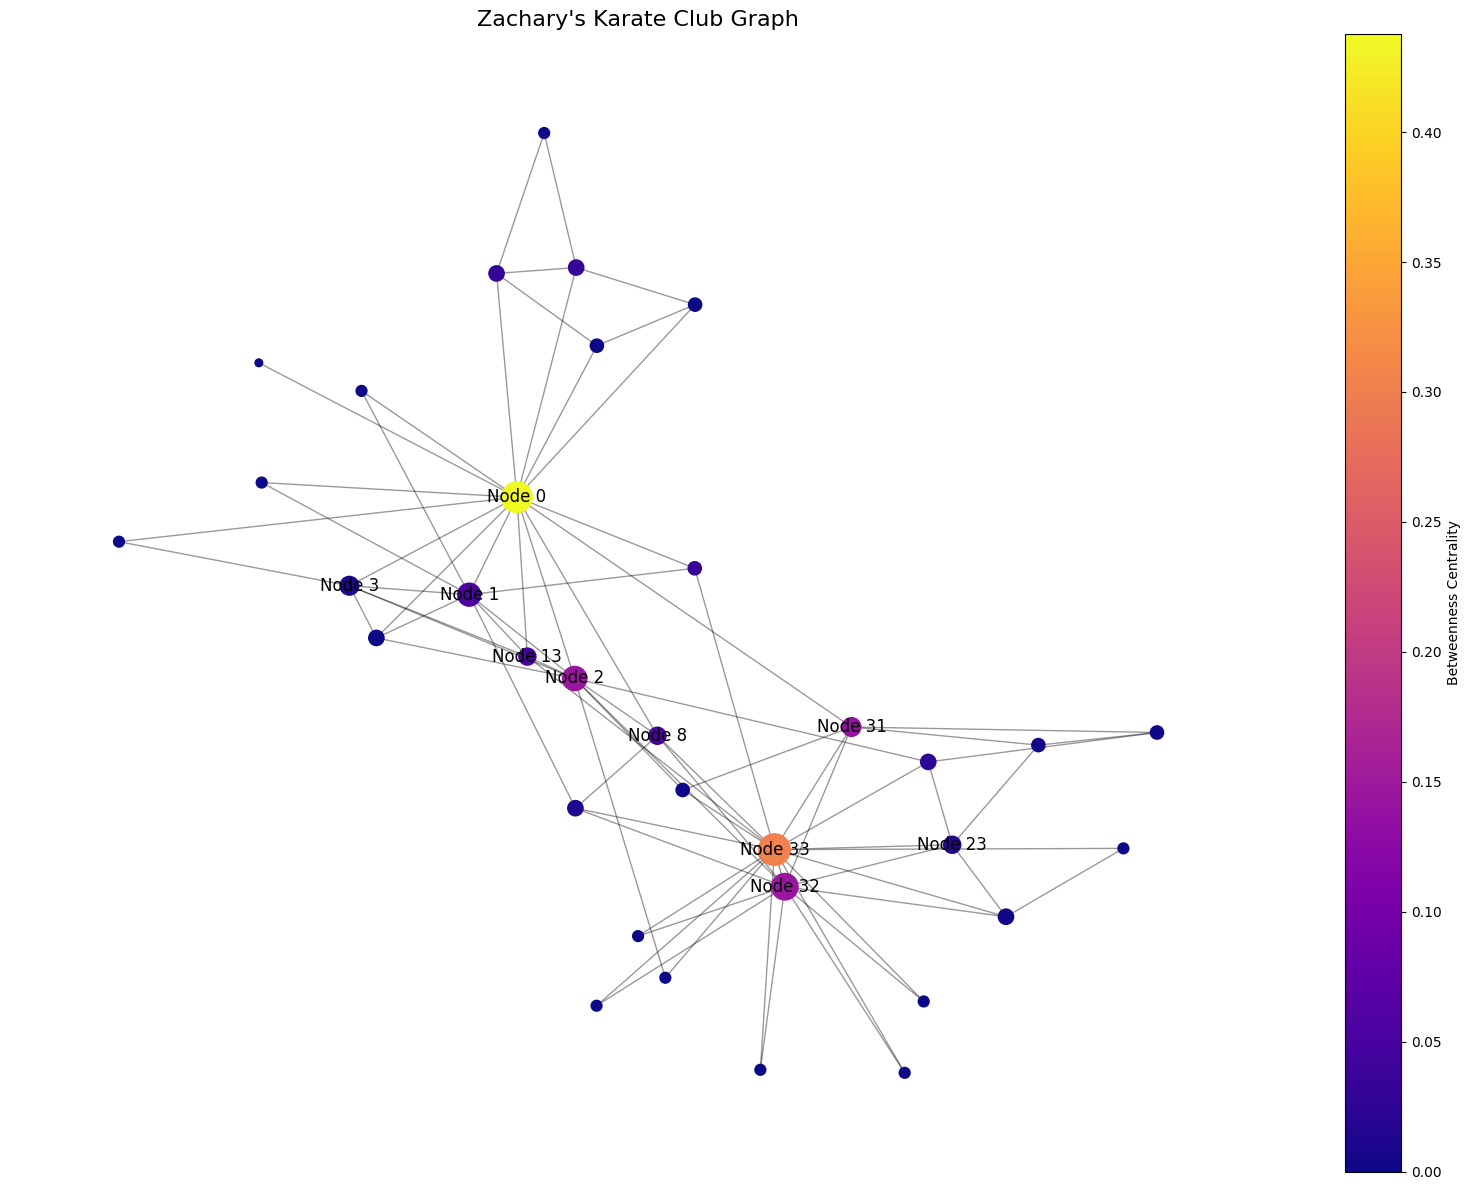

In [13]:

# Drawing the network
plt.figure(figsize=(16, 12))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=custom_cmap)
nx.draw_networkx_labels(G, pos, labels=top_node_labels, font_size=12, font_color='black')

# Adding a colorbar
# Pass the ScalarMappable returned by nx.draw_networkx_nodes to colorbar
plt.colorbar(nodes, label="Betweenness Centrality")

# Adding the title and displaying the plot
plt.title("Zachary's Karate Club Graph", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Summary of Findings
- Number of Nodes: 34
- Number of Edges: 78
- Diameter: 5 — the longest shortest path between any two nodes.
- Average Clustering Coefficient: ~0.571 — indicates moderate clustering behavior, showing how interconnected a node's neighbors are.
- Node 0 has the highest closeness and betweenness and is one of the most influential nodes in the network


Centrality measures reveal the most structurally important individuals in the club. Node 33 has the highest degree (17), followed closely by Node 0 (16), indicating that these two individuals have the most direct connections. Notably, Node 0 also has the highest betweenness centrality (0.44) and closeness centrality (0.57), signifying its role as a key connector and one of the most accessible members in the network. This aligns with its visual prominence in the graph, where Node 0 appears centrally located and is highlighted with a bright yellow node due to its high betweenness.

The graph visualization, colored by betweenness centrality and sized by degree centrality, confirms the central role of Nodes 0 and 33, both of which act as hubs bridging distinct parts of the network. Overall, this structural analysis effectively highlights the club’s power dynamics and offers insight into the key influencers within its social fabric.